In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns

In [2]:
df = pd.read_json('tweets.json',lines=True)

In [3]:
df

,keyword,likes,tweet
0,COVID-19,1,The headline kinda makes it sound like the AP ...
1,COVID-19,0,ATLANTIC CITY — The city's Police Athletic Lea...
2,COVID-19,0,I feel like Diana's line she draws is if his s...
3,COVID-19,1,COVID-19 was the single most fatal communicabl...
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater...
...,...,...,...
128832,World Cup,1,He is in Argentina to play the U20 World Cup
128833,World Cup,0,Messi this season in every competition 60g/a w...
128834,World Cup,29,🚨#2026WCQ 54 African countries will be divided...
128835,World Cup,0,England’s adopted World Cup mascot ‘Dave the C...


In [4]:
df.shape

(128837, 3)

In [5]:
df.keyword.value_counts()

COVID-19              5001
Netflix               5001
Queen Elizabeth       5001
Ukraine               5001
Macdonald             5001
nba                   5001
Weather               5001
Will Smith            5001
Johnny Depp           5001
Jeffrey Dahmer        5001
Black Lives Matter    5001
Olympics              5001
Super Bowl            5001
Vaccine               5001
GameStop              5001
YouTube               5001
Amazon                5001
Zoom                  5001
Bitcoin               5001
NFT                   5001
Tesla                 5001
Elon Musk             5001
iPhone 12             5001
World Cup             5001
Facebook              4817
Dogecoin              1353
India vs England       832
TikTok                 687
Remote work            678
porn                   213
Instagram              124
xvideo                 109
Name: keyword, dtype: int64

In [6]:
df.describe()

,likes
count,128837.000000
mean,23.898453
std,584.283219
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,82843.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128837 entries, 0 to 128836
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  128837 non-null  object
 1   likes    128837 non-null  int64 
 2   tweet    128837 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [8]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [9]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]', "")
df.tweet.head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16248\1073844831.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]', "")


0    the headline kinda makes it sound like the ap ...
1    atlantic city  the citys police athletic leagu...
2    i feel like dianas line she draws is if his sc...
3    covid19 was the single most fatal communicable...
4    studies dogs can detect covid19 with greater t...
Name: tweet, dtype: object

In [10]:
string = "yoo the food was delicious "
print(string.replace("delicious", "Yummy"))  

yoo the food was Yummy 


In [11]:
#Removal of Stop Words
 
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.tweet.head()

0    headline kinda makes sound like ap acknowledge...
1    atlantic city citys police athletic league rec...
2    feel like dianas line draws school experience ...
3    covid19 single fatal communicable disease livi...
4    studies dogs detect covid19 greater 80 sensiti...
Name: tweet, dtype: object

In [12]:
#nltk.download('omw-1.4')

In [13]:
#Lemmatization
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.tweet.head()

0    headline kinda make sound like ap acknowledges...
1    atlantic city city police athletic league rece...
2    feel like diana line draw school experience in...
3    covid19 single fatal communicable disease livi...
4    study dog detect covid19 greater 80 sensitivit...
Name: tweet, dtype: object

In [14]:
df

,keyword,likes,tweet
0,COVID-19,1,headline kinda make sound like ap acknowledges...
1,COVID-19,0,atlantic city city police athletic league rece...
2,COVID-19,0,feel like diana line draw school experience in...
3,COVID-19,1,covid19 single fatal communicable disease livi...
4,COVID-19,0,study dog detect covid19 greater 80 sensitivit...
...,...,...,...
128832,World Cup,1,argentina play u20 world cup
128833,World Cup,0,messi season every competition 60ga world cup ...
128834,World Cup,29,2026wcq 54 african country divided 9 group win...
128835,World Cup,0,england adopted world cup mascot dave cat arri...


In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [16]:
df.columns

Index(['keyword', 'likes', 'tweet'], dtype='object')

In [17]:
df.likes.value_counts()

0        65573
1        24388
2        10501
3         5706
4         3585
         ...  
1046         1
1601         1
2464         1
21545        1
2221         1
Name: likes, Length: 1007, dtype: int64

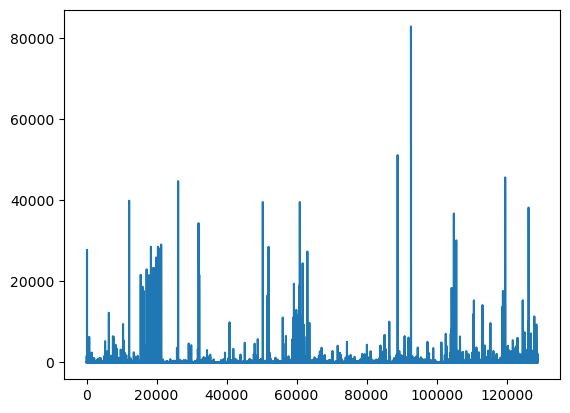

In [18]:
plt.plot(df.likes,);



In [19]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
like = df
# Dropping null values
like.dropna(inplace=True)

In [20]:
likes_1 = like[like['likes'] == 1]
likes_2 = like[like['likes'] == 2]
likes_3 = like[like['likes'] == 3]
likes_4 = like[like['likes'] == 4]
likes_5 = like[like['likes'] == 5]

In [21]:
like_sample = pd.concat([likes_1,likes_2,likes_3,likes_4,likes_5],axis=0)
like_sample.reset_index(drop=True,inplace=True)

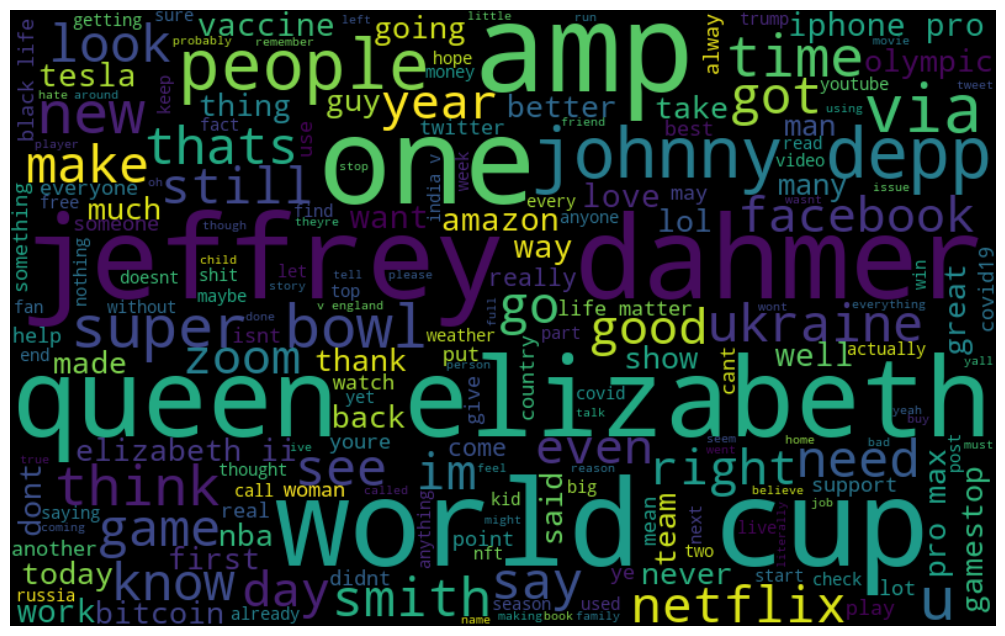

In [22]:
all_words = " ".join([sentence for sentence in df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [24]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['tweet']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.440,0.472,0.088,-0.8739
1,0.000,1.000,0.000,0.0000
2,0.000,0.762,0.238,0.3612
3,0.315,0.446,0.240,-0.5719
4,0.000,0.737,0.263,0.3612


In [25]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,keyword,likes,tweet,neg,neu,pos,compound
0,COVID-19,1,headline kinda make sound like ap acknowledges...,0.44,0.472,0.088,-0.8739
1,COVID-19,0,atlantic city city police athletic league rece...,0.00,1.000,0.000,0.0000
2,COVID-19,0,feel like diana line draw school experience in...,0.00,0.762,0.238,0.3612


In [26]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')


In [27]:
df_c.head()

,keyword,likes,tweet,neg,neu,pos,compound,Sentiment
0,COVID-19,1,headline kinda make sound like ap acknowledges...,0.440,0.472,0.088,-0.8739,Negative
1,COVID-19,0,atlantic city city police athletic league rece...,0.000,1.000,0.000,0.0000,Positive
2,COVID-19,0,feel like diana line draw school experience in...,0.000,0.762,0.238,0.3612,Positive
3,COVID-19,1,covid19 single fatal communicable disease livi...,0.315,0.446,0.240,-0.5719,Negative
4,COVID-19,0,study dog detect covid19 greater 80 sensitivit...,0.000,0.737,0.263,0.3612,Positive


In [28]:
df_c['sign'] = [+1 if x >=0 else -1 for x in df_c.compound]
df_c

,keyword,likes,tweet,neg,neu,pos,compound,Sentiment,sign
0,COVID-19,1,headline kinda make sound like ap acknowledges...,0.440,0.472,0.088,-0.8739,Negative,-1
1,COVID-19,0,atlantic city city police athletic league rece...,0.000,1.000,0.000,0.0000,Positive,1
2,COVID-19,0,feel like diana line draw school experience in...,0.000,0.762,0.238,0.3612,Positive,1
3,COVID-19,1,covid19 single fatal communicable disease livi...,0.315,0.446,0.240,-0.5719,Negative,-1
4,COVID-19,0,study dog detect covid19 greater 80 sensitivit...,0.000,0.737,0.263,0.3612,Positive,1
...,...,...,...,...,...,...,...,...,...
128832,World Cup,1,argentina play u20 world cup,0.000,0.625,0.375,0.3400,Positive,1
128833,World Cup,0,messi season every competition 60ga world cup ...,0.000,0.491,0.509,0.9834,Positive,1
128834,World Cup,29,2026wcq 54 african country divided 9 group win...,0.000,0.570,0.430,0.9485,Positive,1
128835,World Cup,0,england adopted world cup mascot dave cat arri...,0.000,1.000,0.000,0.0000,Positive,1


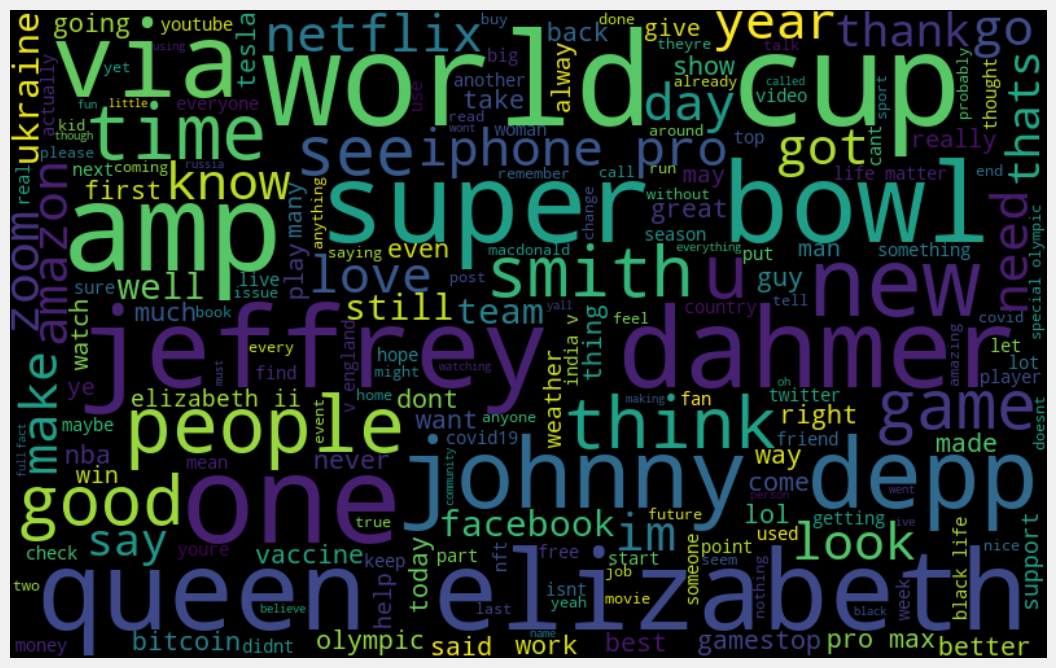

In [29]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df_c['tweet'][df_c['sign']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

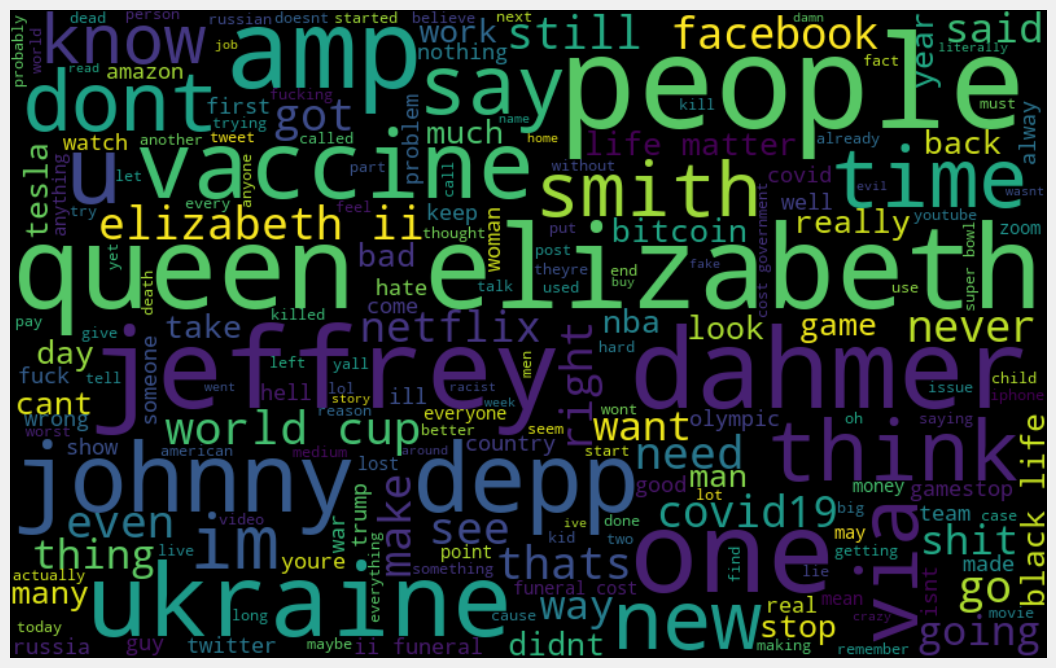

In [30]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df_c['tweet'][df_c['sign']==-1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

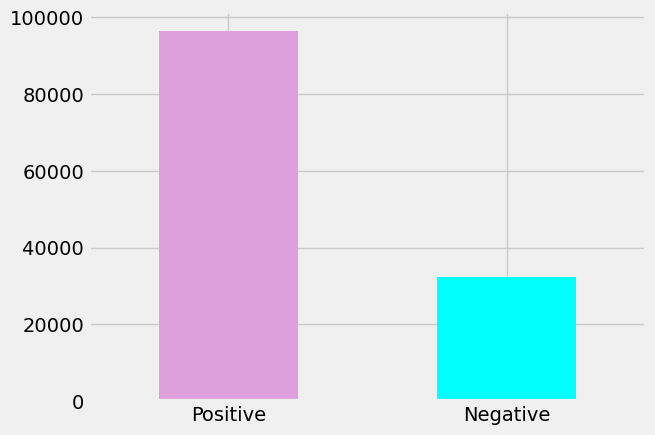

In [31]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

In [32]:
df_c.tweet[8888]

'check fact vaccine nothing autism wakefield study subsequently thoroughly debunked wakefield stripped medical license autism researcher show decisively developmental disorder caused vaccine'

In [33]:
df_c.Sentiment[8888]

'Negative'

In [34]:
df_c.Sentiment[64695]

'Positive'

In [35]:
df_c.tweet[64695]

'beat saturday 2 day got 9pm release gamestop play 28 hour straight food bathroom break lol'

In [36]:
df_c.tweet[12345]

'criminal investigation inspector covell johnson provides safety tip zoom utph community partnership councilcpc utph thanks cpc member time effort making better 310'

In [37]:
df_c.Sentiment[12345]

'Positive'